# Εργασία 2 – Δέντρα Απόφασης & Τυχαία Δάση

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## 1.a. Να φορτώσετε τα δεδομένα σε DataFrame. Στη συνέχεια, να τα περιγράψετε (describe) και να δημιουργήσετε το ιστόγραμμα για κάθε χαρακτηριστικό, καθώς και ραβδόγραμμα για τη μεταβλητή Potability.

### Load Dataset

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Plots

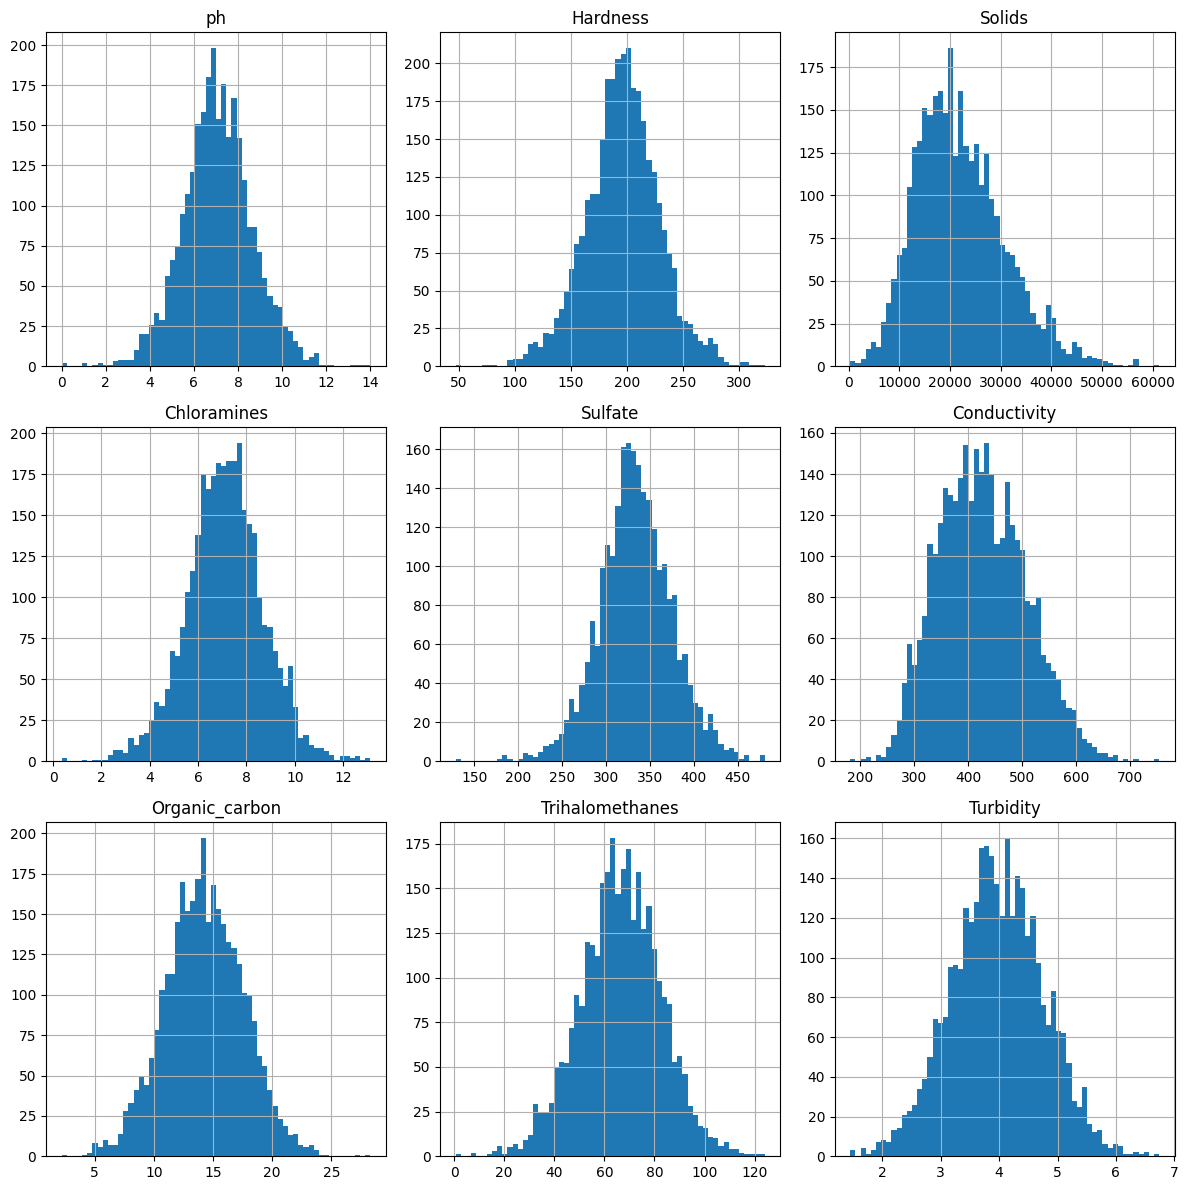

In [4]:
feats_df = df.drop(columns=['Potability'])
outc_df = df['Potability']
feats_df.hist(bins=60, figsize=(12,12))
plt.tight_layout()
plt.show()

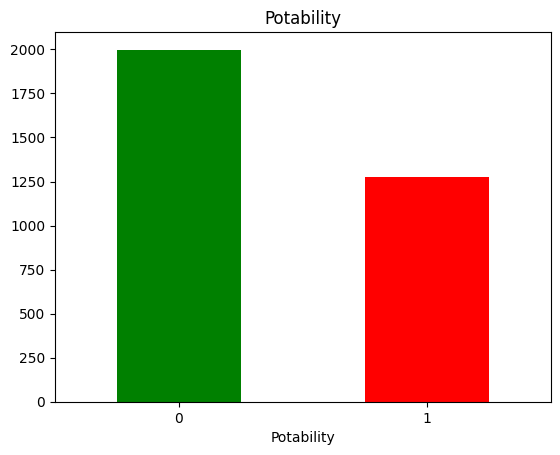

In [5]:
outc_df.value_counts().plot(kind='bar', color=['green','red'], title='Potability')
plt.xticks(rotation=0)
plt.show()

## 1.b. Να αναφέρετε το πλήθος των ελλειπών τιμών για κάθε χαρακτηριστικό και τα ποσοστά πόσιμου και μη-πόσιμου νερού των παραδειγμάτων. Θεωρείτε η ποιότητα των δεδομένων είναι ικανοποιητική?

In [11]:
print(df.keys())

zero_counts = {c: int((df[c] == 0).sum()) for c in df.keys()}
print("---- Counts of missing values per column --------")
for col, cnt in zero_counts.items():
    print(f"Zeros in {col}: {cnt}")
print(df.isnull().sum())

print("\n---- Outcome stats --------")
outcome_vc = df["Potability"].value_counts(dropna=False).sort_index().to_dict()  # ensure {0: x, 1: y}
print("Outcome counts:", outcome_vc)
potability_percent = df['Potability'].value_counts(normalize=True)
print(potability_percent)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
---- Counts of missing values per column --------
Zeros in ph: 1
Zeros in Hardness: 0
Zeros in Solids: 0
Zeros in Chloramines: 0
Zeros in Sulfate: 0
Zeros in Conductivity: 0
Zeros in Organic_carbon: 0
Zeros in Trihalomethanes: 0
Zeros in Turbidity: 0
Zeros in Potability: 1998
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

---- Outcome stats --------
Outcome counts: {0: 1998, 1: 1278}
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


- Οπως παρατηρησα στο df.describe και με την αναλυση μου υπαρχουν missing values και ενα μηδενικο στα δεδομενα μας, συγκερκιμενα στα ph (491) στα Sulfate (781) και στα Trihalomethanes (162) το οποιο ειναι πιθανο να επηρεασει την αποτελεσματικοτητα των μοντελων. </br>
- Επισης το Outcome ειναι ανισα κατανεμημενο (60.9% ποσιμο vs 39% μη-ποσιμο) οποτε παρατηρω ενα μικρο data imbalance. </br> </br>
Οποτε, *οχι*, την ποιοτητα των δεδομενων δεν την θεωρω ικανοποιητικη.

## 2.a. Σύμφωνα με τον Παγκόσμιο Οργανισμό Υγείας (ΠΟΥ), τα προτεινόμενα επίπεδα pH του νερού είναι 6.5 και 8.5. Υπολογίστε τα ποσοστά πόσιμου και μη-πόσιμου νερού των παραδειγμάτων για α) pH<6.5, β) 6.5≤pH≤8.5 και η) 8.5<pH.

In [13]:
ph_below = df[df['ph'] < 6.5]
potability_ph_below = ph_below['Potability'].value_counts(normalize=True)*100
print(potability_ph_below)

Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64


In [14]:
ph_between = df[(df['ph'] >= 6.5) & (df['ph'] <= 8.5)]
potability_ph_between = ph_between['Potability'].value_counts(normalize=True)*100
print(potability_ph_between)

Potability
0    56.099398
1    43.900602
Name: proportion, dtype: float64


In [15]:
ph_above = df[df['ph'] < 6.5]
potability_ph_above = ph_above['Potability'].value_counts(normalize=True)*100
print(potability_ph_above)

Potability
0    63.22314
1    36.77686
Name: proportion, dtype: float64


## 2.b. Σε τι βαθμό επαληθεύεται η ιδιότητα αυτή στα δεδομένα σας?

Στα δεδομενα δεν παρατηρειται εμφανως αυτη η περιοχη. Μεταξυ 6.5≤pH≤8.5 φαινεται να ειναι ισομερισμενα το ποσιμο vs μη-ποσιμο το οποιο δεν οδηγει σε καποιο συμπερασμα. Φαινεται ομως οτι στις περιοχες εκτος αυτου του οριου οτι το μη-ποσιμο κυριαρχει με 63% και στις 2 περιοχες (πανω και κατω). Πραγμα που σημαινει οτι ενω το ph ειναι σημαντικος παραγοντας, δεν ειναι ο μονος που επηρεαζει αν ειναι ποσιμο το νερο.

## 3.a. Σύμφωνα με τον ΠΟΥ, τα προτεινόμενα επίπεδα χλωραμίνης είναι ως 4 ppm. Δημιουργήστε διάγραμμα διασποράς (scatter plot) μεταξύ x: pH και y: Chloramine, στο οποίο θα χρωματίσετε τα πόσιμα παραδείγματα με μπλε και τα μη-πόσιμα με κόκκινο.

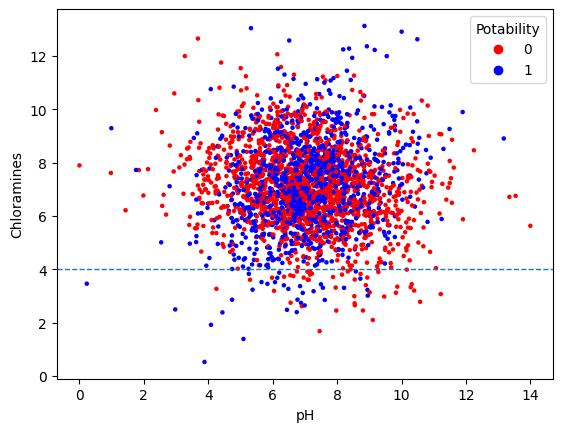

In [30]:
colors = df['Potability'].map({0: 'red', 1: 'blue'})
plt.scatter(df['ph'], df['Chloramines'], c=colors, s=5)
plt.axhline(4, linestyle='--', linewidth=1)
plt.xlabel('pH')
plt.ylabel('Chloramines')
handles = [plt.Line2D([], [], marker='o', linestyle='', color='red', label='0'),
           plt.Line2D([], [], marker='o', linestyle='', color='blue', label='1')]
plt.legend(handles=handles, title='Potability')
plt.show()

## 3.b. Τι διαπιστώνετε για τη διαχωρισιμότητα των παραδειγμάτων? 

Τα δειγματα απλωνονται σχεδον σε ολο το επιπεδο του γραφηματος, χωρις εμφανες συνορο που να τα ξεχωριζει. Η εντονη αλληλοεπικαλυψη δειχνει οτι ο συνδυασμος pH και Chloramine δεν παραγει καθαρο διαχωρισμο. Επιπλεον, παροτι ο ΠΟΥ προτεινει μεγιστο ~4 ppm για χλωραμινες, αρκετα δειγματα, ανεξαρτητα απο την κατηγορια τους, ξεπερνουν αυτο το οριο. Συνεπως, τα χαρακτηριστικα Chloramine και PH απο μονα τους δεν αρκοθν για να διακρινουν αξιοπιστα ποσιμα απο μη ποσιμα δειγματα με βαση το οριο του ΠΟΥ.

## 4. Συμπληρώστε τις ελλειπής τιμές. Να συμπληρώσετε με τη μέση τιμή (πχ df[‘x’] = df[‘x’].fillna(df[‘x’].mean()).

In [32]:
feats_df
feats_df_mean_na = feats_df.fillna(feats_df.mean())
print(df.isnull().sum())
print(feats_df_mean_na.isnull().sum())
print(feats_df_mean_na.head())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        8

## 5. Δημιουργήστε numpy arrays με κατάλληλα inputs (x) και targets (y), όπου target το potability. Χωρίστε τα δεδομένα σε train-test σε ποσοστό 70-30 αντίστοιχα με 0 seed.

In [37]:
x = feats_df_mean_na.to_numpy()
y = df['Potability'].to_numpy()
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

## 6. Εκπαιδεύστε ταξινομητή Δέντρο Απόφασης (Decision Tree) στο train set και ύστερα μετρήστε την ακρίβεια του (accuracy) στα train, test σετ.